# Cleanup and Analysis of Suricata Benchmarking Results

## Experiment Definition


According to call on 2019-07-25:

- VNF: Suricata IDS
- parameters:
    - cpu_bw 0.1 - 1.0, step 0.1
    - core pinnig (1 core per container)
    - memory: 1024MB
    - rulset: empty, small, large
    - low sizes (pcaps): smallFlows, bigFlows (tcpreplay -i data -tK --loop 1000)
    - repetitions: 10
    - round time (measurement of one config): 30 seconds
- recorded metrics:
    - suricata_bytes
    - suricata_dropped
    - suricate_drops
    - suricata_packets
    
  


In [1]:
# basics
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib
import numpy as np
import random
random.seed(12121)
np.random.seed(12121)

## Data Cleaning

In [2]:
df = pd.read_csv("vnfbr-003-custom-metrics.csv")

In [3]:
df

Unnamed: 0 flow_size ruleset  cpu_bw  suricata_bytes  suricata_packets  \
0             0     small     big     0.5      74330424.0          138800.0   
1             1     small     big     0.5      75262604.0          139680.0   
2             2     small     big     0.5      73405210.5          137720.0   
3             3     small     big     0.5      74501508.5          138800.0   
4             4     small     big     0.5      73500203.0          136160.0   
5             5     small     big     0.5      70235673.5          130440.0   
6             6     small     big     0.5      74832367.0          139480.0   
7             7     small     big     0.5      74865886.5          139800.0   
8             8     small     big     0.5      70860318.5          131120.0   
9             9     small     big     0.5      74062409.5          137880.0   
10           10       big     big     0.5      53206124.0          167200.0   
11           11       big     big     0.5      46937926.5          149280.0   
12           12       big     big     0.5      52204645.0          162240.0   
13           13       big     big     0.5      50348550.0          157760.0   
14           14       big     big     0.5      50059268.0          156960.0   
15           15       big     big     0.5      49961628.5          156880.0   
16           16       big     big     0.5      50494333.5          158320.0   
17           17       big     big     0.5      49498820.5          152480.0   
18           18       big     big     0.5      48651734.5          152760.0   
19           19       big     big     0.5      48665566.5          154200.0   
20           20     small   small     0.5     186990631.0          317440.0   
21           21     small   small     0.5     184449454.5          314007.0   
22           22     small   small     0.5     182427881.0          313629.0   
23           23     small   small     0.5     186127424.0          316880.0   
24           24     small   small     0.5     177392937.0          304306.0   
25           25     small   small     0.5     171451836.5          292956.5   
26           26     small   small     0.5     171424158.0          293760.0   
27           27     small   small     0.5     172206631.0          294240.0   
28           28     small   small     0.5     170735403.0          298127.0   
29           29     small   small     0.5     173935109.0          299120.0   
..          ...       ...     ...     ...             ...               ...   
330         330       big   small     1.0     138200910.0          352738.5   
331         331       big   small     1.0     162461641.0          423513.0   
332         332       big   small     1.0     133714675.0          334923.0   
333         333       big   small     1.0     126543617.0          299472.0   
334         334       big   small     1.0     161168080.0          423958.0   
335         335       big   small     1.0     138867189.5          346027.0   
336         336       big   small     1.0     138075291.0          346481.0   
337         337       big   small     1.0     135230982.0          317060.0   
338         338       big   small     1.0     135186226.5          344326.0   
339         339       big   small     1.0     143147929.0          345945.5   
340         340     small   empty     1.0             NaN               NaN   
341         341     small   empty     1.0             NaN               NaN   
342         342     small   empty     1.0             NaN               NaN   
343         343     small   empty     1.0             NaN               NaN   
344         344     small   empty     1.0             NaN               NaN   
345         345     small   empty     1.0             NaN               NaN   
346         346     small   empty     1.0             NaN               NaN   
347         347     small   empty     1.0             NaN               NaN   
348         348     small   empty     1.0             N

/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


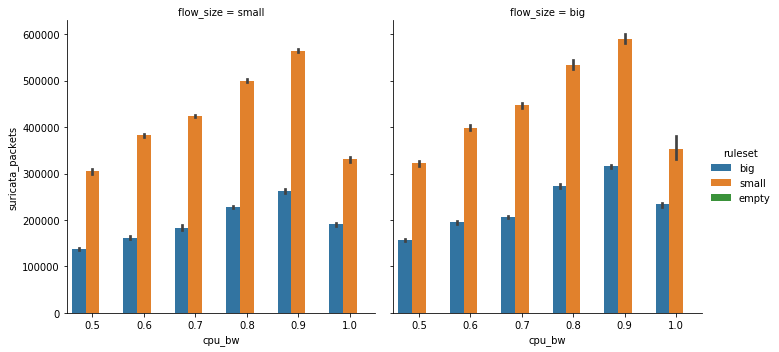

In [4]:
sns.catplot(data=df, x="cpu_bw", y="suricata_packets", hue="ruleset", col="flow_size", kind="bar")

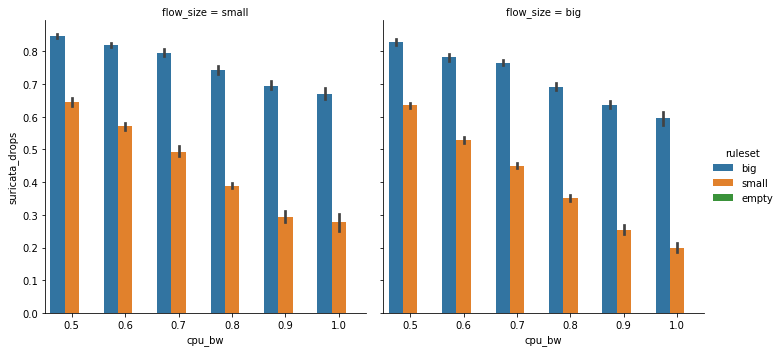

In [5]:
sns.catplot(data=df, x="cpu_bw", y="suricata_drops", hue="ruleset", col="flow_size", kind="bar")